In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spopt
from scipy.stats import norm
import matplotlib.mlab as mlab

f = open("calibration_big.txt","r")
energy = [100, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

part_abs = 2.
part_sd = 0.05

# read data
data = []
data_ = []
for line in f:
    if line == '\n':
        data.append(data_)
        data_ = []
    else:
        data_.append(float(line[:-2]))

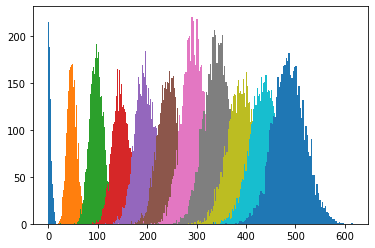

In [2]:
for data_ in data:
    plt.hist(data_, bins=100);

In [3]:
def curve(x, mu, sigma, nevents):
    return nevents / (np.sqrt(2 * np.pi * sigma**2)) * np.exp( - (x - mu)**2 / (2 * sigma**2))

mus = {}
delta_mus = {}

In [4]:
def proc_calibration(number, bins0, p0, cut=[0, -1]):
    start, stop = cut
    en = energy[number]
    n, bins, patches = plt.hist(data[number], bins=bins0);
    bin_centers = bins[:-1] + np.diff(bins) / 2
    bin_centers = bin_centers[start:stop]
    n = n[start:stop]
    
    data_fit_n = []
    data_fit_bin_centers = []
    for i in range(len(n)):
        if n[i] > 0:
            data_fit_n.append(n[i])
            data_fit_bin_centers.append(bin_centers[i])
    
    popt, pcov = spopt.curve_fit(
        curve, data_fit_bin_centers, data_fit_n, p0 = p0,
        bounds = [(0), (10**20)], sigma = np.sqrt(np.array(data_fit_n))
    )
    
    mu, sigma, nevents = popt
    delta_mu, delta_sigma, delta_nevents = np.sqrt(np.diag(pcov))
    
    mus[en] = mu
    delta_mus[en] = delta_mu
    
    print(f"mu = {mu} +- {delta_mu}\nsigma = {sigma} +- {delta_sigma}\nnevents = {nevents} +- {delta_nevents}")
    x = np.linspace(bin_centers[0], bin_centers[-1], 500)
    plt.plot(x, curve(x, mu, sigma, nevents))


mu = 2.3918513875299237 +- 0.30977365253782535
sigma = 4.0106990021338715 +- 0.19786778294458016
nevents = 1392.483138169001 +- 78.27355592442824


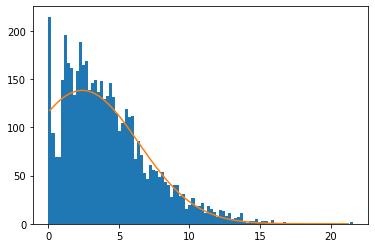

In [6]:
proc_calibration(0, 100, [3, 10, 10000])

mu = 48.57259017223263 +- 0.21293680663136028
sigma = 9.506925161847054 +- 0.1492830666121879
nevents = 4138.1168701583365 +- 90.57864759827952


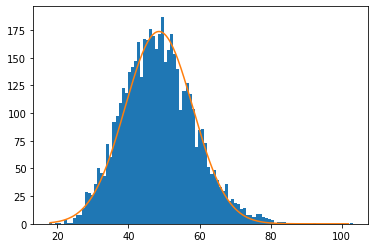

In [7]:
proc_calibration(1, 100, [50, 10, 10000])

mu = 97.9367664892211 +- 0.20236751170501677
sigma = 13.92414035700594 +- 0.1440063340815658
nevents = 6406.058324812905 +- 92.02962777151427


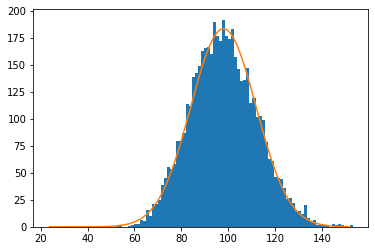

In [8]:
proc_calibration(2, 100, [100, 10, 10000])

mu = 147.00658986990533 +- 0.26145945365625683
sigma = 16.89353872920218 +- 0.1864802459670652
nevents = 6217.485336778727 +- 95.40120820645406


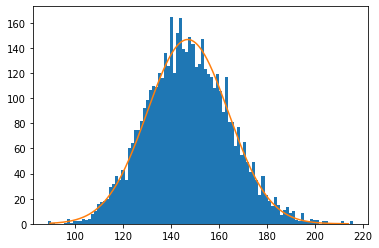

In [10]:
proc_calibration(3, 100, [150, 20, 10000])

mu = 195.50682269953865 +- 0.2799431961356608
sigma = 20.37203135448709 +- 0.20397782262227068
nevents = 8132.045977306653 +- 111.04340445523691


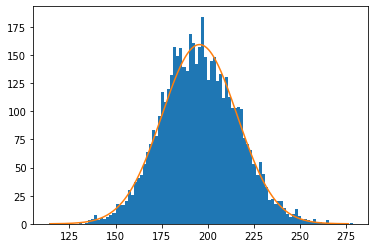

In [11]:
proc_calibration(4, 100, [200, 20, 10000])

mu = 244.41865474532418 +- 0.3319698673567062
sigma = 22.096898859254768 +- 0.23896478201533505
nevents = 8800.586287037735 +- 131.27875614840005


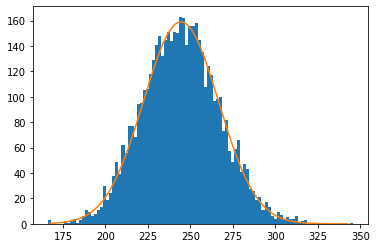

In [12]:
proc_calibration(5, 100, [250, 25, 10000])

mu = 293.9422682723015 +- 0.37226705356166784
sigma = 23.95497945896573 +- 0.26839370920472444
nevents = 12166.098411883584 +- 187.99124942543497


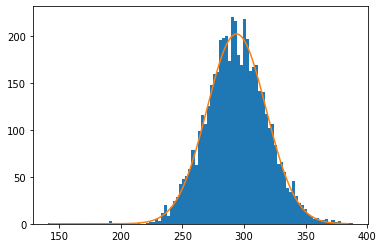

In [13]:
proc_calibration(6, 100, [300, 25, 10000])

mu = 342.561886698252 +- 0.3779286159435203
sigma = 27.245626931015302 +- 0.276651849098758
nevents = 13081.71285702197 +- 180.31522287873014


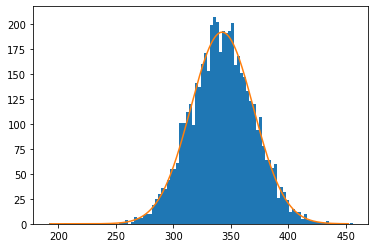

In [14]:
proc_calibration(7, 100, [350, 25, 10000])

mu = 390.58791010181585 +- 0.4175069162233298
sigma = 28.33871462491741 +- 0.3086691575222541
nevents = 10357.255031404451 +- 151.45100354309102


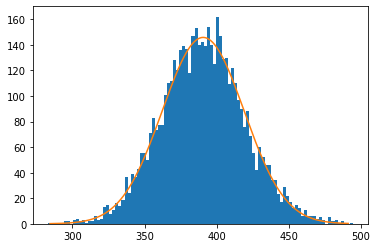

In [15]:
proc_calibration(8, 100, [400, 30, 10000])

mu = 438.4922422183985 +- 0.37425391042120704
sigma = 29.749612359017554 +- 0.27887364696176564
nevents = 11121.369875672794 +- 138.76853439344768


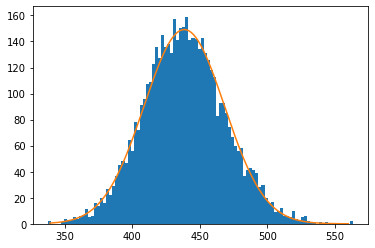

In [16]:
proc_calibration(9, 100, [450, 30, 10000])

mu = 487.4462910055412 +- 0.4458902748462906
sigma = 32.12875133354233 +- 0.3278419173054651
nevents = 13973.826377452522 +- 192.8541053114647


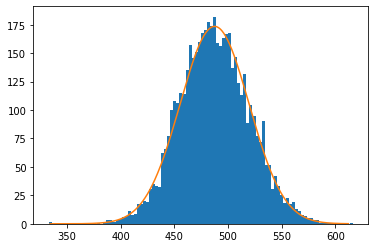

In [17]:
proc_calibration(10, 100, [500, 30, 10000])

In [18]:
energy_mean= [mus[en] for en in energy]
energy_std = [delta_mus[en] for en in energy]

a = 0.04889328699902019 +- 9.890437132634616e-05
b = -0.3290850763757008 +- 0.4616469081909697


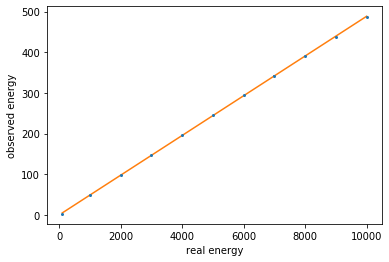

In [19]:
# fit
popt, pcov = spopt.curve_fit(lambda x, a, b: a*x+b, energy, energy_mean, sigma = energy_std)
a, b = popt
delta_a, delta_b = np.sqrt(np.diag(pcov))
plt.errorbar(energy, energy_mean, fmt='o', markersize=2, yerr=energy_std)
plt.xlabel('real energy')
plt.ylabel('observed energy')
x = np.linspace(energy[0], energy[-1], 500)
plt.plot(x, a*x+b)
print(f"a = {a} +- {delta_a}\nb = {b} +- {delta_b}")

In [20]:
def get_real_energy(E_observed):
    return(E_observed - b) / a

In [21]:
f = open("reduction_big.txt","r")
energy_real = [500, 1500, 2500, 3500, 4500, 5500, 6500, 7500, 8500, 9500]


data_reduction = []
data_reduction_ = []
for line in f:
    if line == '\n':
        data_reduction.append(data_reduction_)
        data_reduction_ = []
    else:
        data_reduction_.append(float(line[:-2]))


In [22]:
data_real = [get_real_energy(np.array(data_reduction_)) for data_reduction_ in data_reduction]
sigmas = {}
delta_sigmas = {}

In [23]:
def proc(number, bins0, p0, cut=[0, -1]):
    start, stop = cut
    en = energy_real[number]
    n, bins, patches = plt.hist(data_real[number], bins=bins0);
    bin_centers = bins[:-1] + np.diff(bins) / 2
    bin_centers = bin_centers[start:stop]
    n = n[start:stop]
    
    data_fit_n = []
    data_fit_bin_centers = []
    for i in range(len(n)):
        if n[i] > 0:
            data_fit_n.append(n[i])
            data_fit_bin_centers.append(bin_centers[i])
    
    popt, pcov = spopt.curve_fit(
        curve, data_fit_bin_centers, data_fit_n, p0 = p0,
        bounds = [(0), (10**20)], sigma = np.sqrt(np.array(data_fit_n))
    )
    
    mu, sigma, nevents = popt
    delta_mu, delta_sigma, delta_nevents = np.sqrt(np.diag(pcov))
    
    sigmas[en] = sigma
    delta_sigmas[en] = delta_sigma
    
    print(f"mu = {mu} +- {delta_mu}\nsigma = {sigma} +- {delta_sigma}\nnevents = {nevents} +- {delta_nevents}")
    x = np.linspace(bin_centers[0], bin_centers[-1], 500)
    plt.plot(x, curve(x, mu, sigma, nevents))

mu = 493.99019966732396 +- 2.329402992013235
sigma = 140.8273216177359 +- 1.8791636471798634
nevents = 11673.574565573528 +- 185.79056594341668


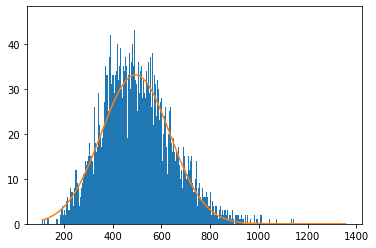

In [24]:
proc(0, 500, [500, 150, 10000])

mu = 1501.4892846868574 +- 3.8516193792985756
sigma = 243.02742819093922 +- 3.0245291312633333
nevents = 21125.786307317918 +- 325.39099600354825


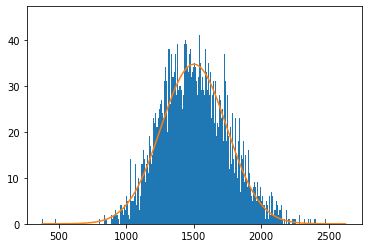

In [25]:
proc(1, 500, [1500, 200, 100000])

mu = 2488.71614680363 +- 4.781955945603656
sigma = 313.3660246510837 +- 3.822887235635283
nevents = 23906.019728798798 +- 354.62953773595444


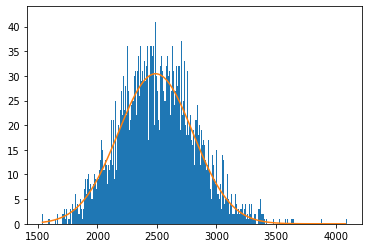

In [26]:
proc(2, 500, [2500, 300, 100000])

mu = 3514.300080126648 +- 5.600088619426126
sigma = 369.55023061996593 +- 4.373398589891571
nevents = 33174.4558468374 +- 491.8474476182735


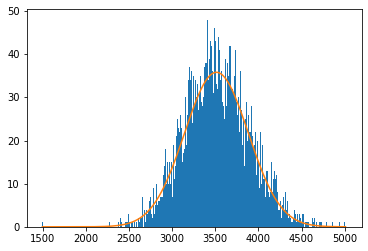

In [27]:
proc(3, 500, [3500, 400, 100000])

mu = 4521.677047249395 +- 6.38085681185128
sigma = 430.14167952539844 +- 5.0963383934222035
nevents = 30610.12896130876 +- 440.7431288246326


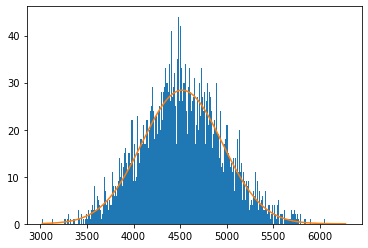

In [28]:
proc(4, 500, [4500, 500, 100000])

mu = 5503.410055872488 +- 7.3393277038352
sigma = 475.0117270739678 +- 5.828445582415281
nevents = 34040.50754811992 +- 508.28295080773023


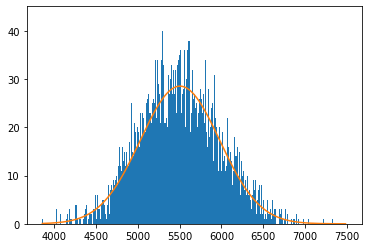

In [29]:
proc(5, 500, [5500, 500, 100000])

mu = 6509.364438614167 +- 7.42255588007048
sigma = 512.8953741896516 +- 5.68019485735961
nevents = 59742.80439384516 +- 845.8761008288401


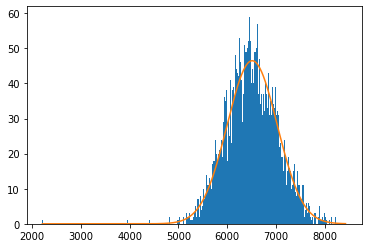

In [30]:
proc(6, 500, [6500, 500, 100000])

mu = 7493.378211075467 +- 8.711444568197445
sigma = 561.9245413560689 +- 6.727862757013638
nevents = 51409.1736657725 +- 780.3045176497103


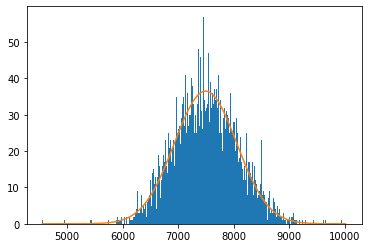

In [31]:
proc(7, 500, [7500, 600, 100000])

mu = 8464.554900447314 +- 9.369553508137576
sigma = 587.12365122607 +- 7.298379663785191
nevents = 46502.01779091874 +- 728.5173712322758


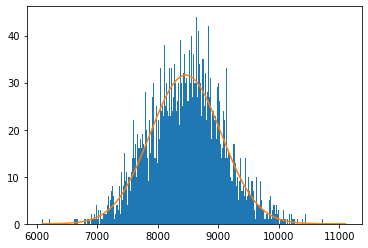

In [32]:
proc(8, 500, [8500, 500, 1000000])

mu = 9466.66350939264 +- 9.424882148623741
sigma = 633.1521824965303 +- 7.174427859949171
nevents = 92174.28019057662 +- 1346.6189934773154


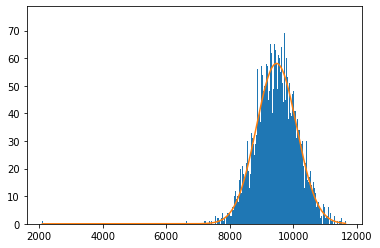

In [33]:
proc(9, 500, [9500, 700, 1000000])

In [34]:
delta_E_to_E = [sigmas[energy_real[i]]/energy_real[i] for i in range(len(sigmas))]

a = 0.0029105344277087788 +- 0.000877640237110613
b = 6.165374163317811 +- 0.06273354637717656


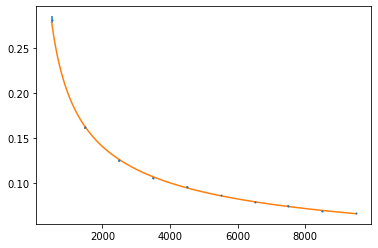

In [38]:
def curve_energy(x, a, b):
    return a + b / np.sqrt(x)

popt, pcov = spopt.curve_fit(curve_energy, energy_real, delta_E_to_E, sigma = [delta_sigmas[energy_real[i]]/energy_real[i] for i in range(len(sigmas))])
a, b = popt
delta_a, delta_b = np.sqrt(np.diag(pcov))
print(f"a = {a} +- {delta_a}\nb = {b} +- {delta_b}")
plt.errorbar(energy_real, delta_E_to_E, yerr=[delta_sigmas[energy_real[i]]/energy_real[i] for i in range(len(sigmas))], fmt='o', markersize=1)
x = np.linspace(energy_real[0], energy_real[-1], 500)
plt.plot(x, curve_energy(x, a, b))